<a href="https://colab.research.google.com/github/ccxlxy/Coding/blob/main/DecisionTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from sklearn import tree  # 如果导入tree模块，要tree.DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score # 交叉验证
from sklearn.datasets import load_boston

In [ ]:
boston=load_boston()
regressor=DecisionTreeRegressor()
cross_val_score(regressor,boston.data,boston.target,cv=5,scoring="neg_mean_squared_error") # 10折交叉验证


array([-12.11941176, -36.49257426, -31.26792079, -51.31118812,
       -73.88841584])

In [ ]:
# 一维回归的图像绘制 
# 导入库
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
# 创建一条含有噪声的sin曲线
rng=np.random.RandomState(0)  # 确定随机值
X=np.sort(6.28*rng.rand(80,1),axis=0) # 注意X的范围（模拟一个完整的sin函数）以及排序问题
y=np.sin(X).ravel() # 注意放入sklearn中训练的数据至少是二维，要降维
# X二维，y一维（这个问题再确定一下原因）

In [ ]:
# 将y每隔5个点加入噪声点在原有数值上进行偏移即可
y[::5]+=3*(0.5-rng.rand(16)) # 注意将浮动范围从（0，1）-》（-0.5，0.5）,通过系数扩大的倍数y要降维

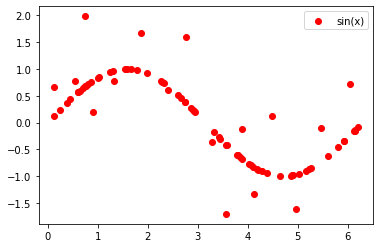

In [ ]:
# 绘制图像
fig,ax=plt.subplots()
ax.scatter(X,y,color="red",label="sin(x)")
plt.legend()
plt.show()

In [ ]:
# 实例化和训练模型
reg_1=DecisionTreeRegressor(max_depth=2)
reg_2=DecisionTreeRegressor(max_depth=5)
reg_1.fit(X,y)
reg_2.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# 测试集导入模型，预测结果
X_test=np.arange(0.0,5.0,0.01)[:,np.newaxis] # arange(开始点，结束点，步长)生成有序数组的函数,注意升维
y_1=reg_1.predict(X_test) # 一维array
y_2=reg_2.predict(X_test)

# 注意增维切片np.newaxis

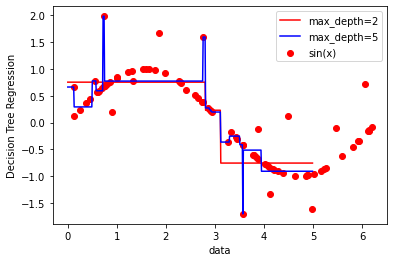

In [ ]:
# 绘图
fig,ax=plt.subplots()
ax.scatter(X,y,color="red",label="sin(x)") # 模拟真实数据
ax.plot(X_test,y_1,color="red",label="max_depth=2") # 模拟max_depth=2训练数据
ax.plot(X_test,y_2,color="blue",label="max_depth=5")  # 模拟max_depth=5的训练数据
ax.set_xlabel("data")  # 注意使用set_xlabel()接口
ax.set_ylabel("Decision Tree Regression")
plt.legend()
plt.show()
# 结论：max_depth=2模拟效果好些，max_depth=5过拟合了